In [2]:
from rdkit.Chem import Draw
from rdkit import Chem

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole


In [53]:
IPythonConsole.molSize = 500,500
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.minFontSize=15
IPythonConsole.drawOptions.bondLineWidth=2

In [9]:
mol = Chem.MolFromSmiles("c1c[nH]c(CN2CCc3ccccc3C2)c1")
mol

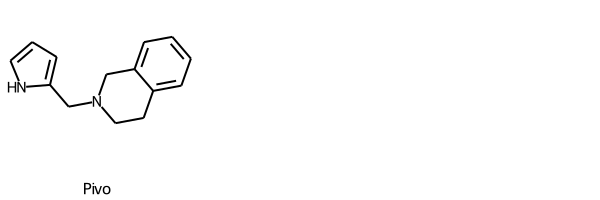

In [46]:
display(Chem.Draw.MolsToGridImage([mol], legends=["Pivo"]))

In [11]:
import pandas as pd
import sqlite3

In [15]:
con = sqlite3.connect("../data/propriedades.db")

In [16]:
novos_ligantes = pd.read_sql("select * from novos_ligantes",con)

In [17]:
seis_primeiros_ligs = novos_ligantes.loc[novos_ligantes.Smiles.str.contains("#")].sort_values(by='active_probability', ascending=False).iloc[:6,:]

In [23]:
seis_primeiros_ligs = seis_primeiros_ligs.to_numpy().tolist()

In [31]:
elementos = [Chem.MolFromSmiles(elemento[0]) for elemento in seis_primeiros_ligs]
prob = [f"{elemento[-1]:0.2f}%" for elemento in seis_primeiros_ligs]             

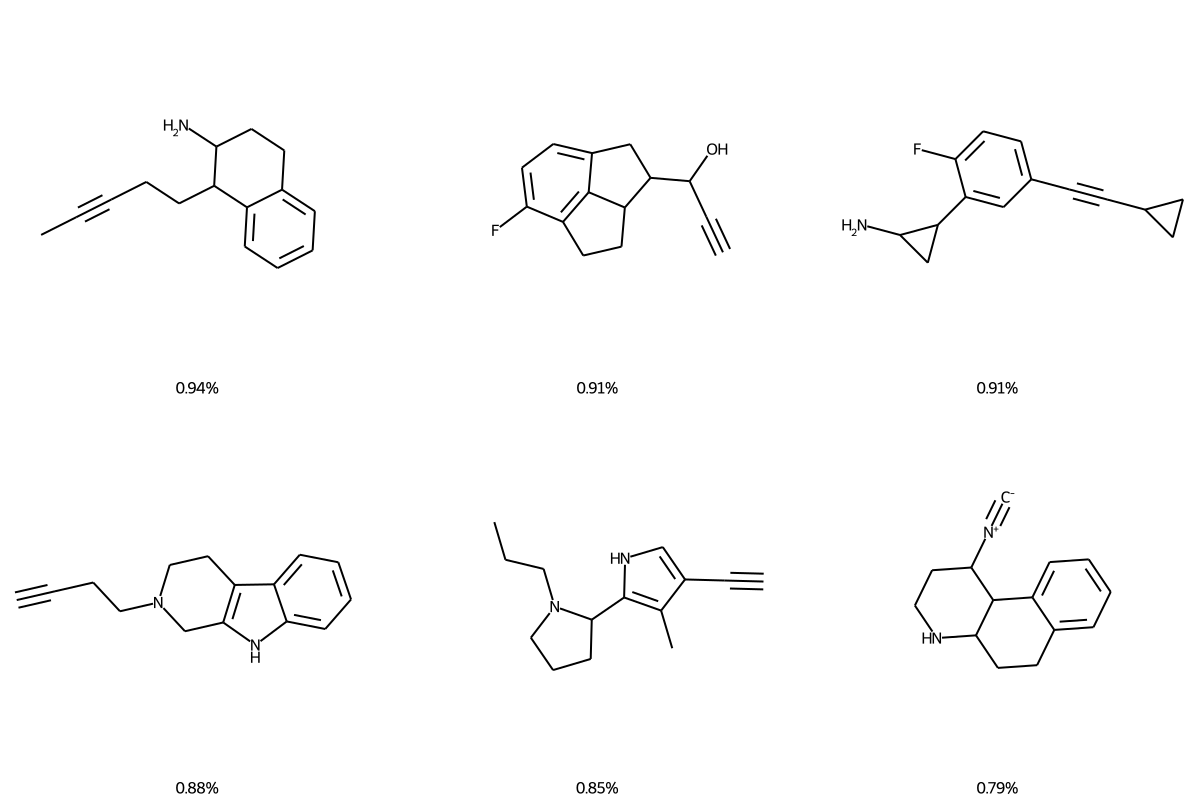

In [42]:
Chem.Draw.MolsToGridImage(elementos, legends=prob,subImgSize=(400,400))